In [16]:
import random
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [5]:
## 16:40

class NearestNeighbors:
    
    def __init__(self, k=5):
        self.k = k
    
    def train(self, X, y):
        self.X = X
        self.y = y
        
        
    def predict(self, X):
        if len(X.shape) == 1:
            X = [X]
        y = []
        for xb in X:
            distances = [np.linalg.norm(xb - xa) for xa in self.X]
            nearest_neighbors = np.argsort(distances)[:self.k]
            labels = [self.y[nb] for nb in nearest_neighbors]
            y.append(stats.mode(labels)[0][0])
        return y
            
# 16:53

In [11]:
dfIris = pd.read_csv("iris.csv")
X = dfIris.values[:,:4].astype(float)
y = dfIris.values[:,4]
X_red = X[:,[0,1]]
knn = NearestNeighbors()
knn.train(X_red, y)
knn.predict(X_red[[100, 5],:])

['virginica', 'setosa']

In [18]:
def cross_validate(learner, X, y, train_size, repeats):
    scores_in = []
    scores = []
    n = len(X)
    num_examples = int(train_size * n)
    
    for r in range(repeats):
        indices_train = random.sample(range(n), num_examples)
        learner.train(X[indices_train,:], y[indices_train])
        indices_test = [i for i in range(n) if not i in indices_train]
        
        # compute in-sample error
        y_hat = learner.predict(X[indices_train])
        mistakes = 0
        for i, pred in enumerate(y_hat):
            act = y[indices_train[i]]
            if pred != act:
                mistakes += 1
        scores_in.append(mistakes / len(indices_train))
        
        # compute validation error
        y_hat = learner.predict(X[indices_test])
        mistakes = 0
        for i, pred in enumerate(y_hat):
            act = y[indices_test[i]]
            if pred != act:
                mistakes += 1
        scores.append(mistakes / len(indices_test))
        
    return np.mean(scores_in), np.mean(scores)
# 17:26

In [20]:
scores_in = []
scores_val = []
anchors = list(range(10, 101, 5))
for k in tqdm(anchors):
    e_in, e_out = cross_validate(knn, X, y, k / len(X), 100)
    scores_in.append(e_in)
    scores_val.append(e_out)

/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


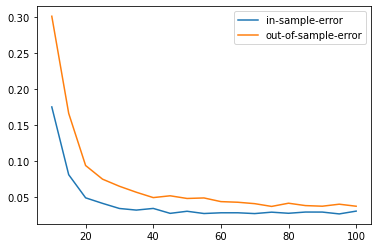

In [40]:
fig, ax = plt.subplots()
ax.plot(anchors, scores_in, label="in-sample-error")
ax.plot(anchors, scores_val, label="out-of-sample-error")
ax.legend()
plt.show()

In [38]:

x1_min = min(X[:,0])
x1_max = max(X[:,0])
x2_min = min(X[:,1])
x2_max = max(X[:,1])

U1 = np.linspace(4, 8, 100)
U2 = np.linspace(2, 5, 100)

X_red = X[:,[0,1]]

knn = NearestNeighbors()
knn.train(X_red, y)

classes = list(np.unique(y))
Z = np.zeros((100, 100))
for i, u in enumerate(U1):
    for j, v in enumerate(U2):
        x = [u, v]
        y_hat = knn.predict(np.array([x]))[0]
        y_hat_numeric = classes.index(y_hat)
        Z[i,j] = y_hat_numeric
print(Z)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


In [41]:
classes

['setosa', 'versicolor', 'virginica']

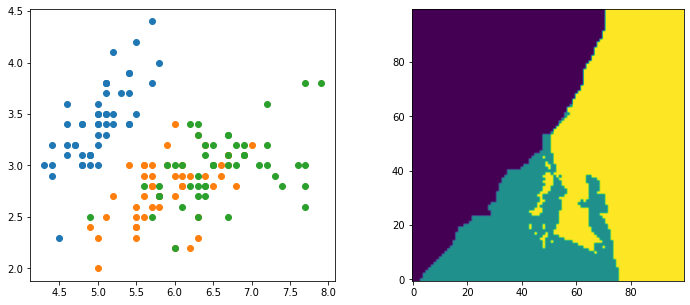

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for c in classes:
    lines = y == c
    ax[0].scatter(X[lines,0], X[lines,1])
ax[1].imshow(Z.T, origin='lower')
#ax[1].set_xticklabels(np.round(U1,2))